In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from utils import *
from sklearn.model_selection import StratifiedKFold
%load_ext autoreload

%autoreload 2

In [149]:
df=loadData(quant=True,unSkew=True,remCols=3)
X = df.drop(columns=['price'])
Y = df['price']
kf = StratifiedKFold(n_splits=10, shuffle=False)

/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [150]:
X.shape

(53940, 6)

In [2]:
from utils import *
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

In [152]:
type(df['price'].apply(np.log)[4])

numpy.float64

In [3]:
from yellowbrick.regressor import CooksDistance
from yellowbrick.datasets import load_concrete

In [4]:
from scipy.special import boxcox, inv_boxcox

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [101]:
remColParam=2

In [7]:
df = loadData(quant=True, unSkew=False, remCols=remColParam)
X = df.drop(columns=['price'])

In [26]:
deSkew(df)

carat:0.020450070764268666
carat: 0.020450070764268666: boxcox
depth: No Change


PLEASE WORK 0.5993289324435086
price:0.025876138778519013
price: 0.025876138778519013: boxcox
x: No Change
y: 0.3636482008742052: Sqrt
z: 0.0139742634447758: Sqrt


/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1.577105,5,6,2,61.5,4.007333,4.794711,3.95,1.994994,1.558846
1,-1.682146,4,6,3,59.8,4.110874,4.788546,3.89,1.959592,1.519868
2,-1.577105,2,6,5,56.9,4.174387,4.790608,4.05,2.017424,1.519868
3,-1.313519,4,2,4,62.4,4.060443,4.808866,4.20,2.056696,1.621727
4,-1.238751,2,1,2,63.3,4.060443,4.810863,4.34,2.085665,1.658312
...,...,...,...,...,...,...,...,...,...,...
53935,-0.333678,5,7,3,60.8,4.043051,6.129187,5.75,2.400000,1.870829
53936,-0.333678,2,7,3,63.1,4.007333,6.129399,5.69,2.397916,1.900000
53937,-0.362780,3,7,3,62.8,4.094345,6.129611,5.66,2.383275,1.886796
53938,-0.151907,4,3,2,61.0,4.060443,6.128975,6.15,2.473863,1.933908


In [161]:
X.shape

(53940, 6)

In [102]:
poly = PolynomialFeatures(degree=9-remColParam, interaction_only=False,\
                            include_bias=True)
# a = pd.DataFrame(poly.fit_transform(X))

In [11]:
df = loadData()
df = deSkew(df)

carat:0.020450070764268666
carat: 0.020450070764268666: boxcox
cut: Categorical
color: Categorical
clarity: Categorical
depth: No Change
table:0.0
table: 0.0: boxcox
price:0.025876138778519013
price: 0.025876138778519013: boxcox
x: No Change
y: 0.3636482008742052: Sqrt
z: 0.0139742634447758: Sqrt


/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [103]:
X_train, X_test, y_train, y_test = (scaledTrainTestSplit(loadData(quant=True, unSkew=True, remCols=remColParam)))


carat:0.020450070764268666
carat: 0.020450070764268666: boxcox
depth: No Change


PLEASE WORK 0.5993289324435086
x: No Change
y: 0.3636482008742052: Sqrt
z: 0.0139742634447758: Sqrt


/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [104]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression

In [81]:
# y_train = np.log(y_train)
# y_test= np.log(y_test)

In [105]:
reg = Ridge(alpha=0.0001).fit(X_train,y_train)

/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


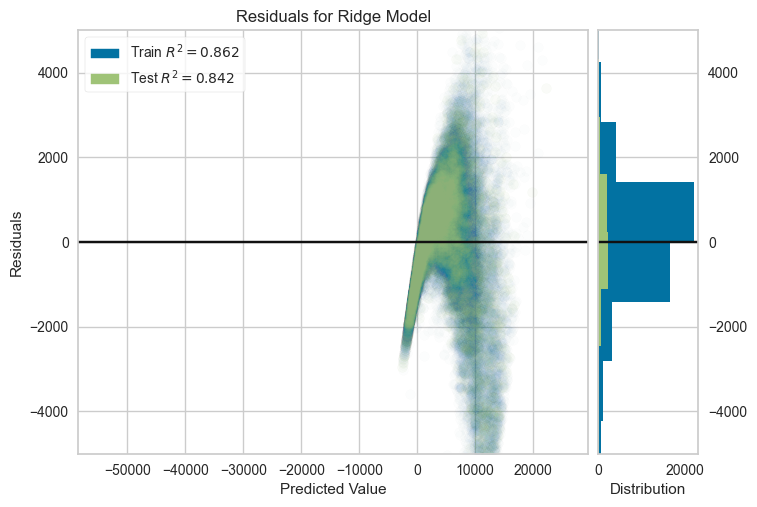

Split Training RSME: 1479.150505335933, Testing RSME: 1604.8036657788546



In [111]:
fig,axs = plt.subplots(1)
axs.set_ylim(bottom=-5000,top=5000)
# axs.set_xlim(left=5, right=11)
        
visualizer = ResidualsPlot(reg, ax=axs, train_alpha=0.01, test_alpha=0.05)
visualizer.fit(X_train, y_train)
visualizer.score(X_test,y_test)
visualizer.show()
        
trainPred = reg.predict(X_train)
testPred = reg.predict(X_test)
# trainRSME = mean_squared_error(np.exp(trainPred),np.exp(y_train), squared=False)
explainedvar = explained_variance_score(trainPred, y_train)
# testRSME = mean_squared_error(np.exp(testPred), np.exp(y_test), squared=False)
trainRSME = mean_squared_error(trainPred,y_train,squared=False)
testRSME = mean_squared_error(testPred, y_test, squared=False)
# testRSME = mean_squared_error(testPred, y_test, multioutput='raw_values')

print(f"Split Training RSME: {trainRSME}, Testing RSME: {testRSME}\n")


In [107]:
np.sqrt(((trainPred-y_train)**2).mean()

1479.150505335933

In [108]:
np.sqrt(((testPred-y_test)**2).mean())

1604.8036657788546

In [32]:
y_train.to_numpy()

array([ 3548, 12310,  3321, ...,  6033,  2915,  1728])

In [42]:
testRSME

array([13201109.94570401])

In [163]:
Y = df['price']
for train_index, test_index in kf.split(a, Y.to_numpy()):
    print(a.iloc[train_index].shape)

/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


(48546, 924)
(48546, 924)
(48546, 924)
(48546, 924)
(48546, 924)
(48546, 924)
(48546, 924)
(48546, 924)
(48546, 924)
(48546, 924)


In [9]:
df = loadData()
df = deSkew(df)

carat:0.020450070764268666
carat: 0.020450070764268666: boxcox
cut: Categorical
color: Categorical
clarity: Categorical
depth: No Change
table:0.0
table: 0.0: boxcox
price:0.025876138778519013
price: 0.025876138778519013: boxcox
x: No Change
y: 0.3636482008742052: Sqrt
z: 0.0139742634447758: Sqrt


/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
df['table']

0        7.416198
1        7.810250
2        8.062258
3        7.615773
4        7.615773
           ...   
53935    7.549834
53936    7.416198
53937    7.745967
53938    7.615773
53939    7.416198
Name: table, Length: 53940, dtype: float64

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from collections import OrderedDict
from torch import nn
from torch import optim

In [3]:
model = MLPRegressor(hidden_layer_sizes=[9,100,100,100],
                     activation='relu',
                     solver='adam',
                     alpha=0.1,
                     learning_rate_init=0.001,
                     batch_size=200,
                     learning_rate='invscaling',
                     momentum=0.9,
                     early_stopping=True,
                     validation_fraction=0.1)

In [ ]:
X_train, X_test, y_train, y_test = (scaledTrainTestSplit(loadData(quant=True, unSkew=True)))

In [ ]:
model.fit(X_train,y_train)
trainPred = model.predict(X_train)
testPred = model.predict(X_test)
trainrmse = mean_squared_error(trainPred, y_train, squared=False)
testrmse = mean_squared_error(testPred, y_test, squared=False)
print(f"Train RMSE: {trainrmse}, Test RMSE: {testrmse}")
plt.plot(model.loss_curve_)

In [11]:
torchmodel = nn.Sequential(OrderedDict([
    
    ('dense1', nn.Linear(9, 100)),
    ('act1', nn.ReLU()),
    ('drop1',nn.Dropout(0.1)),
    ('dense2', nn.Linear(100, 50)),
    ('act2', nn.ReLU()),
    ('dense3', nn.Linear(100, 100)),
    ('drop2',nn.Dropout(0.1)),
    ('act3', nn.ReLU()),
    ('dense4', nn.Linear(100, 50)),
    ('output',nn.Linear(50,1))
]))
optimizer = torch.optim.Adam(torchmodel.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

In [ ]:
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)
X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)

carat:0.020450070764268666
carat: 0.020450070764268666: boxcox
cut: Categorical
color: Categorical
clarity: Categorical
depth: No Change
table:0.0
table: 0.0: boxcox
price:0.025876138778519013
price: 0.025876138778519013: boxcox
x: No Change
y: 0.3636482008742052: Sqrt
z: 0.0139742634447758: Sqrt
---------------------------------------------------------

Num Columns Removed: 0



/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


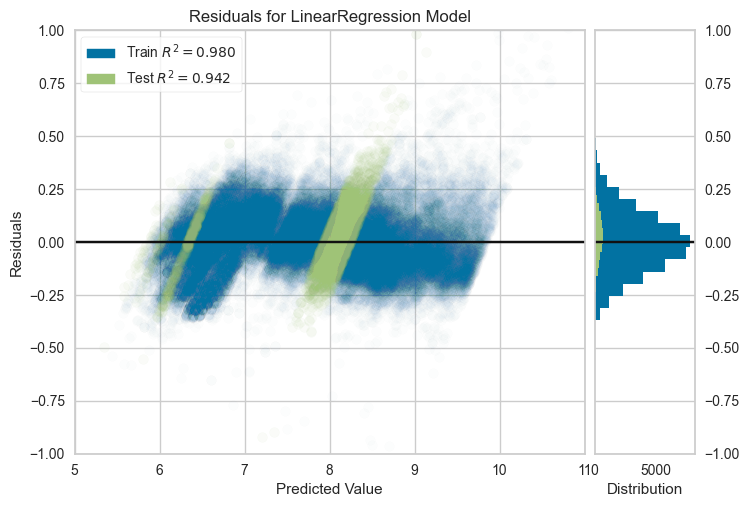

Split Training RSME: 998.7265583697506 Testing RSME 479.1772688970324



/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


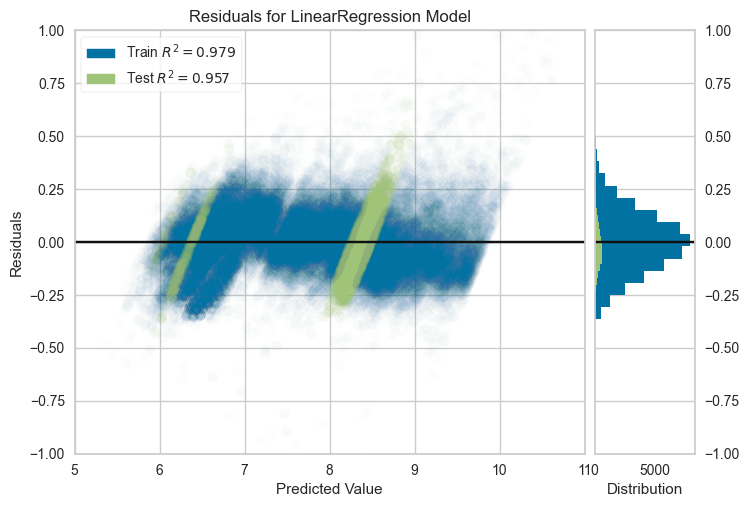

Split Training RSME: 1008.4226116261448 Testing RSME 544.199129061129



/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


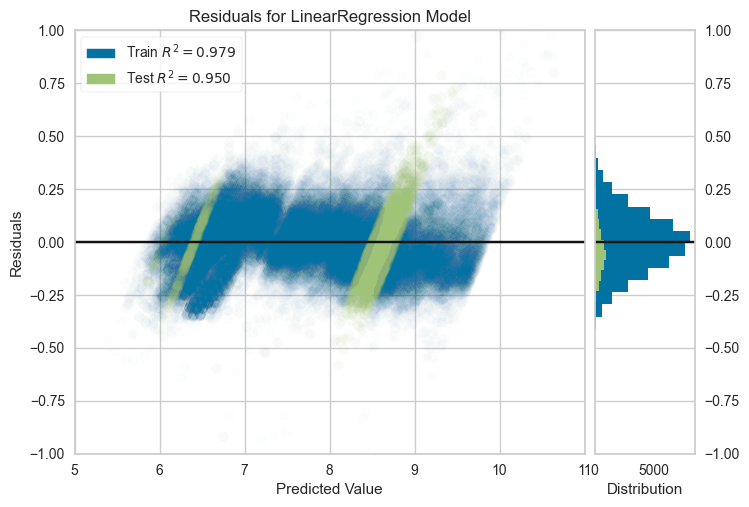

Split Training RSME: 1008.4712079971459 Testing RSME 835.1654585644842



/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


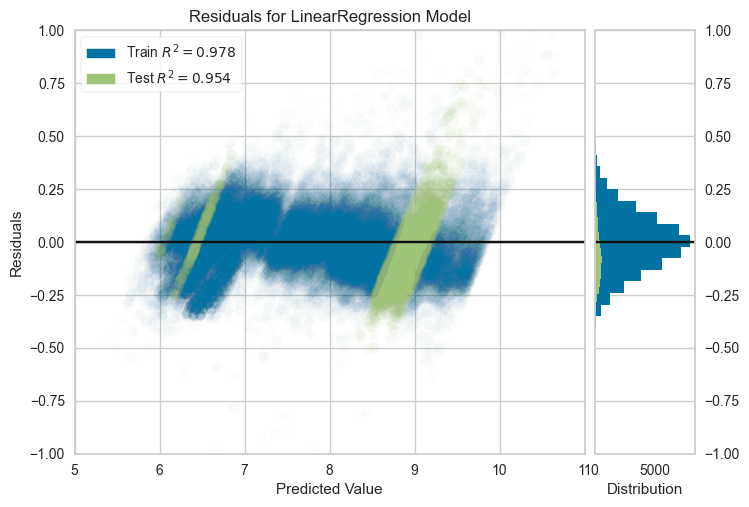

Split Training RSME: 957.2459608812917 Testing RSME 1348.7836059070723



/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


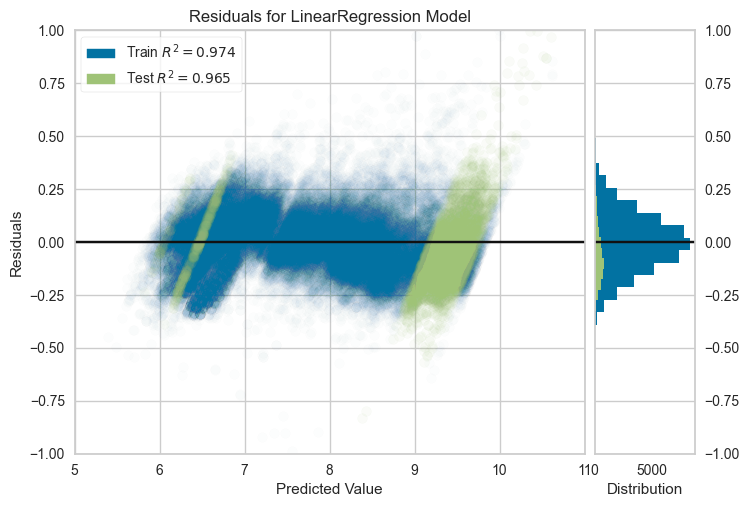

Split Training RSME: 735.7186866263623 Testing RSME 2263.6214356378914



/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


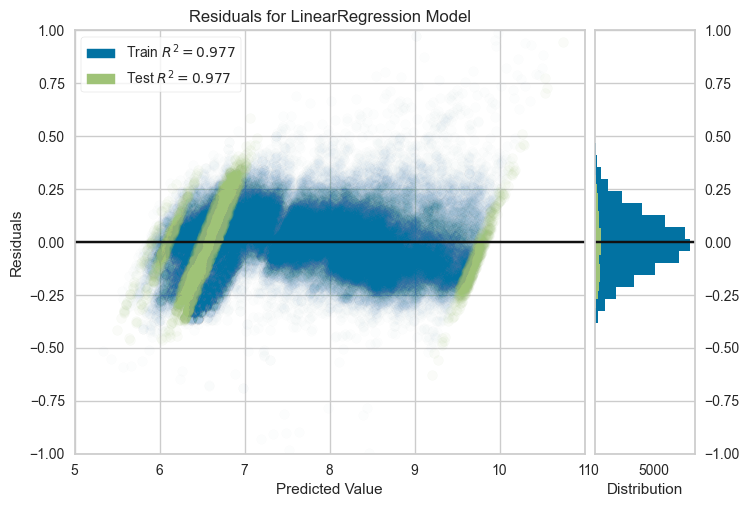

Split Training RSME: 905.8985398629261 Testing RSME 1212.0828727218038



/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


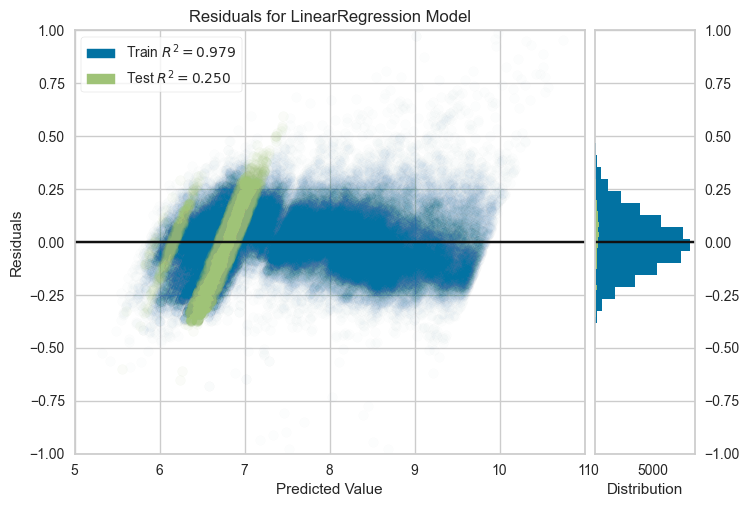

Split Training RSME: 988.7839660505604 Testing RSME 150.61440225399738



/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


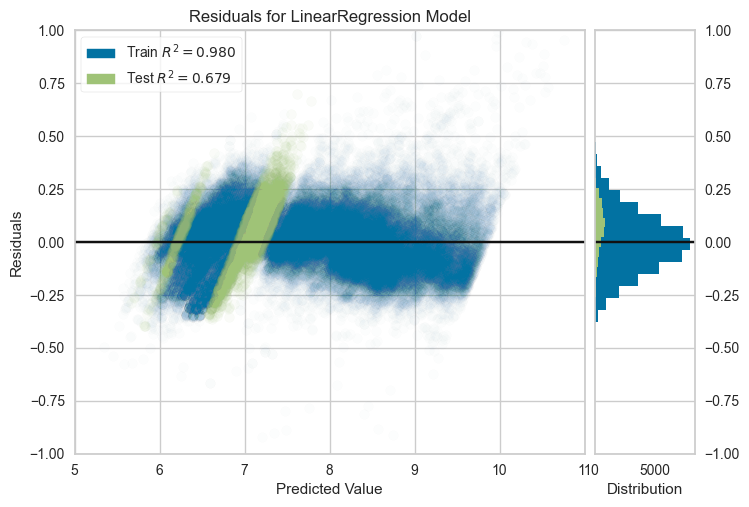

Split Training RSME: 989.0800391486358 Testing RSME 190.5215129241358



/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


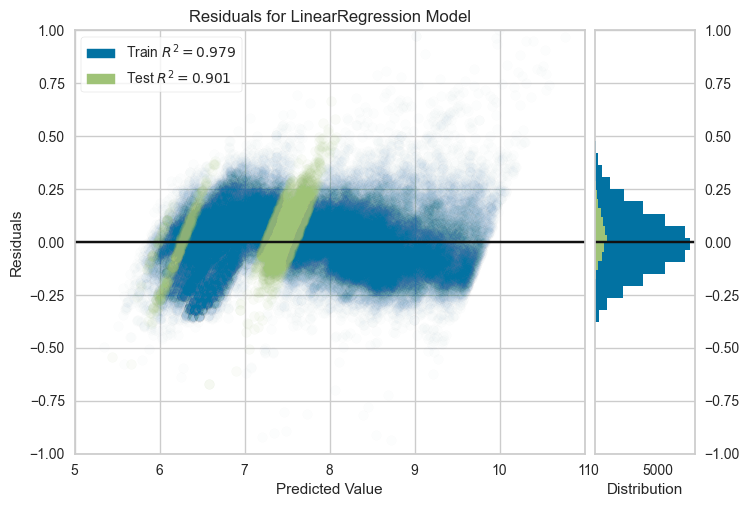

Split Training RSME: 995.4652808880704 Testing RSME 211.29404092910107



/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


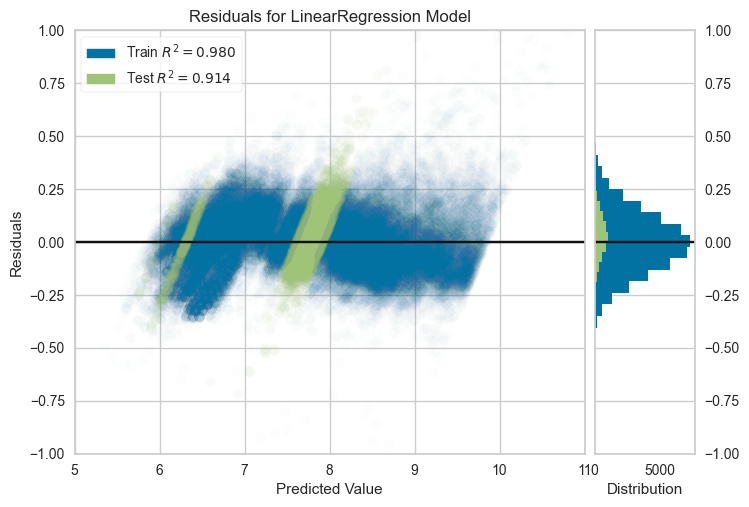

Split Training RSME: 1000.2302075175246 Testing RSME 312.74399366762384

Mean TrainRSME = 958.8043058968412

Mean TestRSME = 754.8203720564272



In [23]:
remColsGrid = [0]
residuals = []
kf = StratifiedKFold(n_splits=10, shuffle=False)
totResiduals = []
for remColParam in remColsGrid:
    df=loadData(quant=True,unSkew=True,remCols=remColParam)
    X = df.drop(columns=['price'])
    Y = df['price']
    
    totalTrainRSME = 0
    totalTestRSME = 0
    print("---------------------------------------------------------\n")
    print(f"Num Columns Removed: {remColParam}\n")
    for train_index, test_index in kf.split(X, Y.to_numpy()):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = np.log(Y.iloc[train_index]), np.log(Y.iloc[test_index])
        # y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        X_train, X_test = scaleTrainTest(X_train, X_test)

        reg = model.fit(X_train,y_train)

        fig,axs = plt.subplots(1)
        axs.set_title('log Residuals for Linear Regression')
        axs.set_ylim(bottom=-1,top=1)
        axs.set_xlim(left=5, right=11)

        visualizer = ResidualsPlot(reg, ax=axs, train_alpha=0.01, test_alpha=0.05)
        visualizer.fit(X_train, y_train)
        visualizer.score(X_test,y_test)
        visualizer.show()


        # trainPred = reg.predict(X_train)
        # testPred = reg.predict(X_test)
        # trainRSME = mean_squared_error(trainPred, y_train, squared=False)
        # testRSME = mean_squared_error(testPred, y_test, squared=False)

        trainPred = reg.predict(X_train)
        testPred = reg.predict(X_test)
        

        trainRSME = mean_squared_error(trainPred,y_train, squared=False)
        testRSME = mean_squared_error(testPred, y_test, squared=False)

        print(f"Split Training RSME: {trainRSME} Testing RSME {testRSME},\n")
        totalTrainRSME += trainRSME
        totalTestRSME += testRSME
    print(f"Mean TrainRSME = {totalTrainRSME/10}\n")
    print(f"Mean TestRSME = {totalTestRSME/10}\n")

In [107]:
for train_index, test_index in kf.split(X, Y):
    print(f"XTrain: {X.iloc[train_index].shape}, Ytrain: {Y.iloc[train_index].shape}")



/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


XTrain: (48546, 9), Ytrain: (48546,)
XTrain: (48546, 9), Ytrain: (48546,)
XTrain: (48546, 9), Ytrain: (48546,)
XTrain: (48546, 9), Ytrain: (48546,)
XTrain: (48546, 9), Ytrain: (48546,)
XTrain: (48546, 9), Ytrain: (48546,)
XTrain: (48546, 9), Ytrain: (48546,)
XTrain: (48546, 9), Ytrain: (48546,)
XTrain: (48546, 9), Ytrain: (48546,)
XTrain: (48546, 9), Ytrain: (48546,)


In [ ]:
Y.shape

(53940,)

In [ ]:
df = loadData()
df.drop(columns=["Unnamed: 0"],inplace=True)  
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75


# Question 1

## 1.1

In [ ]:
#Assigning quantitative values to qualitative features
diamondsDF = df.copy(deep=True)

cutLabels = ["Fair","Good","Very Good", "Premium", "Ideal"]
for i in range(len(cutLabels)):
    diamondsDF['cut'].replace(cutLabels[i],i+1,inplace=True)

clarityLabels = ["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]
for i in range(len(clarityLabels)):
    diamondsDF['clarity'].replace(clarityLabels[i],i+1,inplace=True)

colorLabels = (list(string.ascii_uppercase[3:10]))
for i in range (len(colorLabels)):
    diamondsDF['color'].replace(colorLabels[i],len(colorLabels)-i,inplace=True)
diamondsDF.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,330,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,327,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,328,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,337,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,338,4.34,4.35,2.75


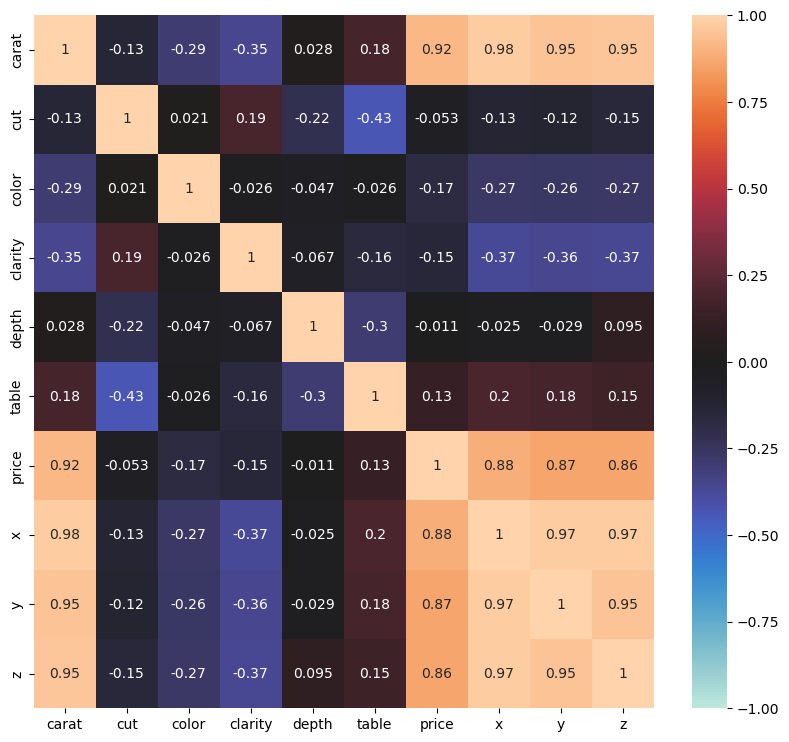

In [ ]:
plt.figure(figsize=(10,9))
corrHeatmap = sns.heatmap(diamondsDF.corr(),vmin=-1,vmax=1,center=0,annot=True)


In [ ]:
diamondsDF.corr()['price'].to_csv("../Figures/Question-1/price_corr_table")
print(diamondsDF.corr()['price'])

carat      0.921591
cut       -0.053493
color     -0.172509
clarity   -0.146802
depth     -0.010648
table      0.127134
price      1.000000
x          0.884436
y          0.865422
z          0.861250
Name: price, dtype: float64


We see by observation that the variable other than **price** that has the highest correlation with the **price** of a diamond is **carat**—the weight of the diamond.  

There is a very positive correlation between the **price** of a diamond and its weight, as well as its size. We know this because **x**,**y**,**z** which refer to the length, width and depth of the diamond,  have very similar positive correlations with **price** of a diamond. **table** has a small positive correlation, meaning it doesn't affect the price of the diamond very much, but it does have a slight positive effect. Finally, **depth** has a correlation near zero, meaning that it has almost no effect on **price**.

Next, let us consider the qualitative features. We see negative covariance values between clarity, 

## 1.2

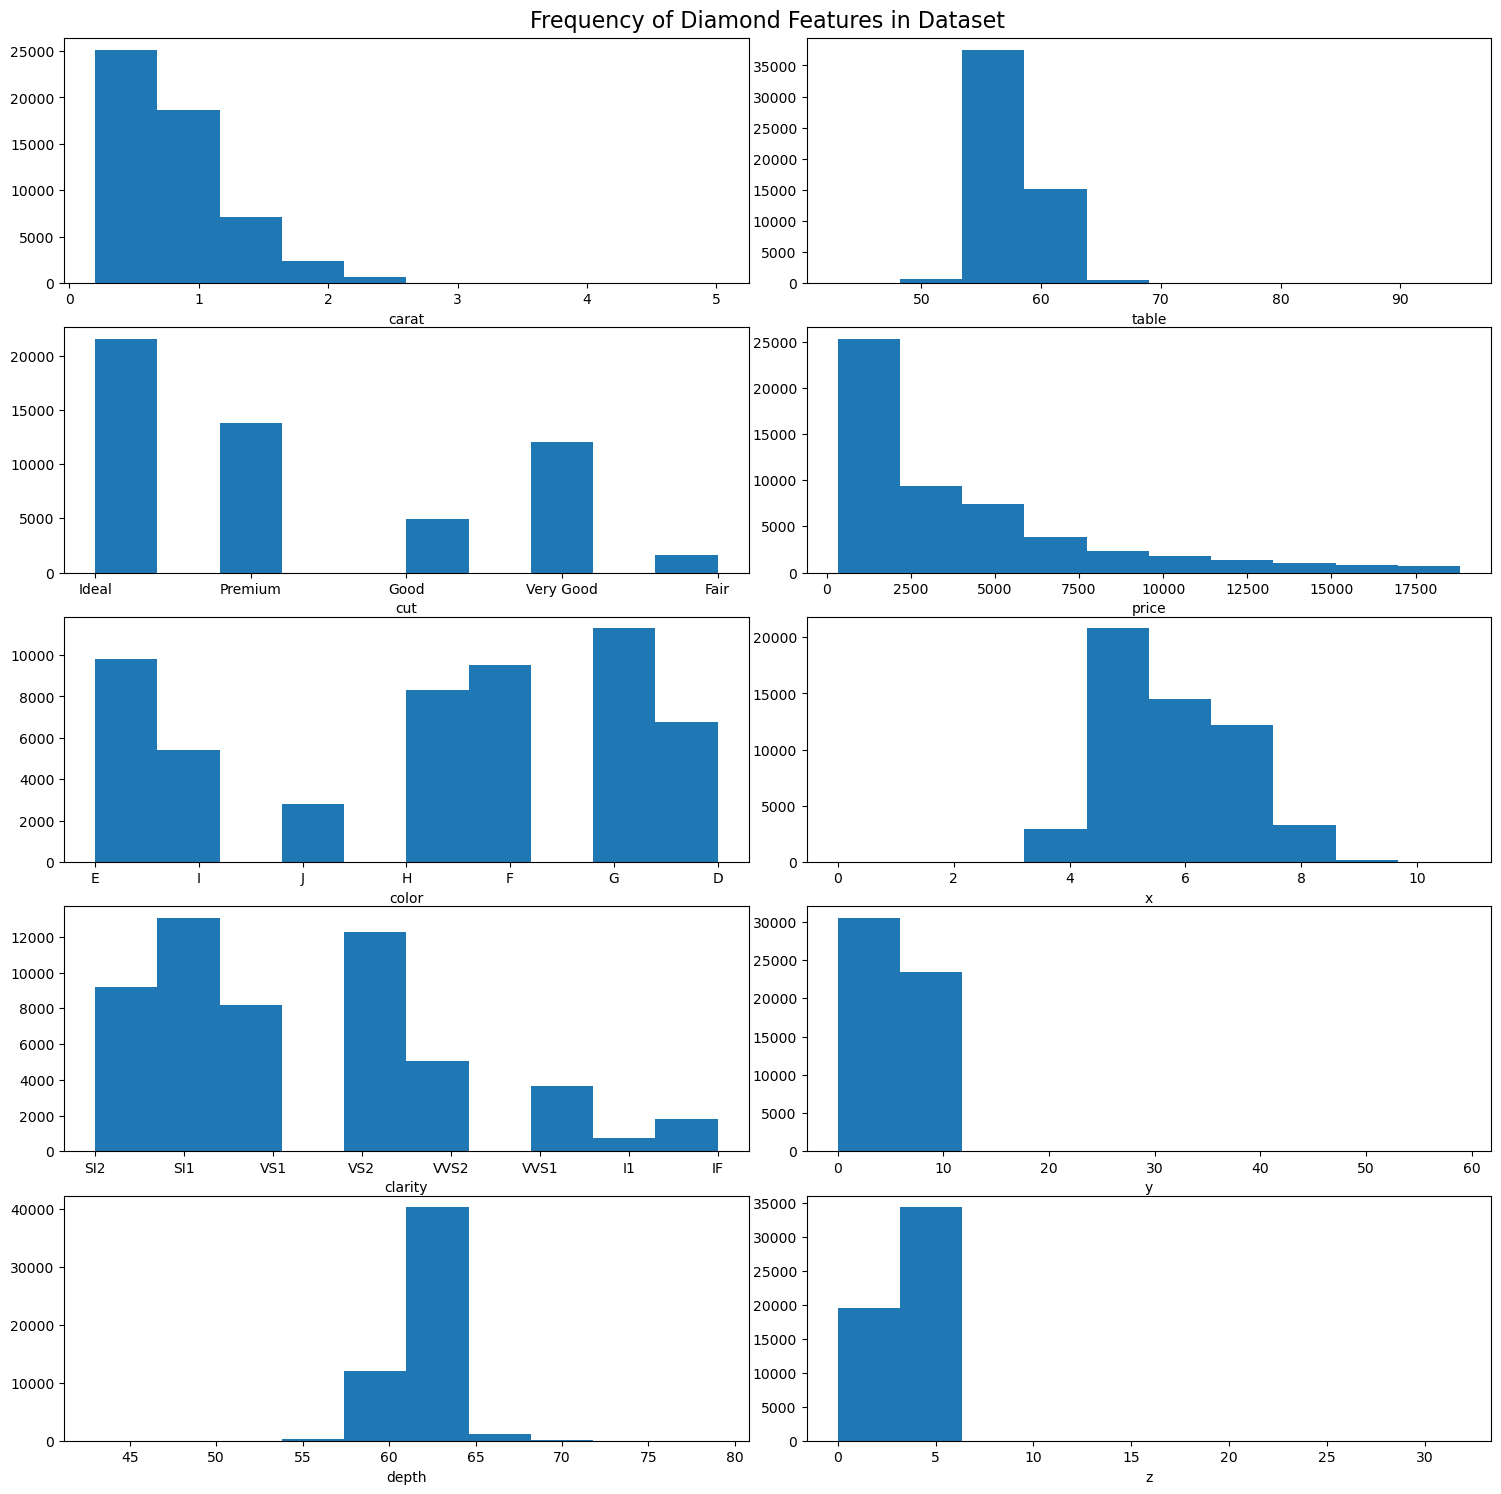

In [ ]:
numRows = len(df.columns)//2
fig, axs = plt.subplots(numRows, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.suptitle("Frequency of Diamond Features in Dataset",fontsize=16)
fig.tight_layout()
i=0
j=0
for x in df.columns:
    if i == numRows:
        j=1
    axs[i-numRows*j,j].hist(df[x])
    axs[i-numRows*j,j].set_xlabel(x)
    i+=1

## 1.3

In [ ]:
from pandas.api.types import CategoricalDtype
import random

<Axes: title={'center': 'price'}, xlabel='clarity'>

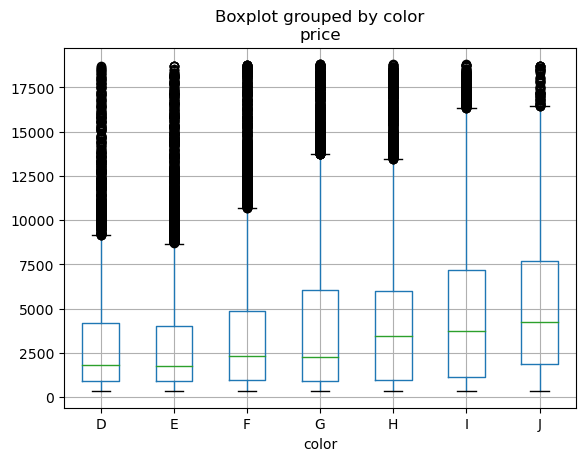

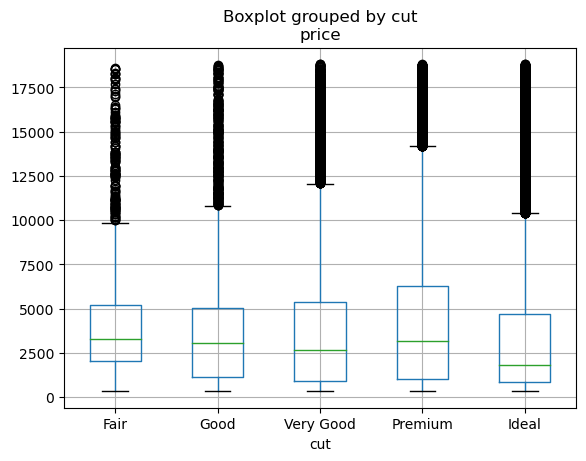

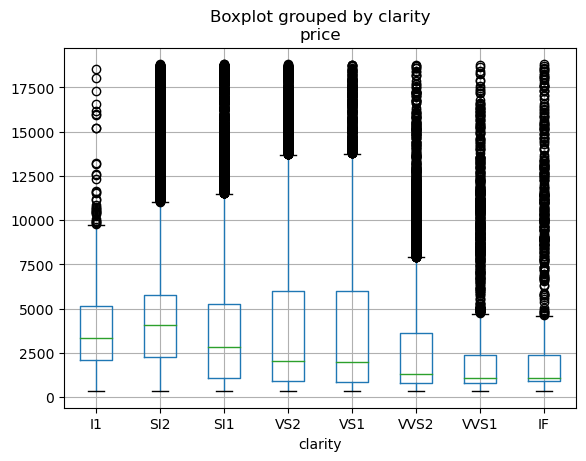

In [ ]:
df.boxplot(column='price',by='color')
cutOrder = CategoricalDtype(cutLabels, ordered=True)
df['cut']=df['cut'].astype(cutOrder)
df.boxplot(column='price',by='cut')
clarityOrder = CategoricalDtype(clarityLabels, ordered=True)
df['clarity'] = df['clarity'].astype(clarityOrder)
df.boxplot(column='price',by='clarity')

# Question 2


## 2.1

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
standardizedDF = pd.DataFrame(scaler.fit_transform(diamondsDF),columns=diamondsDF.columns)
standardizedDF['price']= diamondsDF['price']
standardizedDF.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1.198168,0.981473,0.937163,-1.245215,-0.174092,-1.099672,330,-1.587837,-1.536196,-1.571129
1,-1.240361,0.085889,0.937163,-0.638095,-1.360738,1.585529,327,-1.641325,-1.658774,-1.741175
2,-1.198168,-1.705279,0.937163,0.576145,-3.385019,3.375663,328,-1.498691,-1.457395,-1.741175
3,-1.071587,0.085889,-1.414272,-0.030975,0.454133,0.242928,337,-1.364971,-1.317305,-1.287720
4,-1.029394,-1.705279,-2.002131,-1.245215,1.082358,0.242928,338,-1.240167,-1.212238,-1.117674


## 2.2

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
train, test = train_test_split(standardizedDF, test_size=0.1)

In [ ]:
X_train = train.drop(columns=['price'])
X_test = test.drop(columns=['price'])
y_train = train['price']
y_test = test['price']